In [1235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [1236]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

## Exploratory Data analysis

In [1237]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1238]:
pd.set_option('display.max_columns', None)#Display all columns
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### There are 80 explanatory variables

In [1239]:
print(train.shape)
print(test.shape)
print(train.columns)

(1460, 81)
(1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Ga

### Plotting the correlation heatmap using seaborn

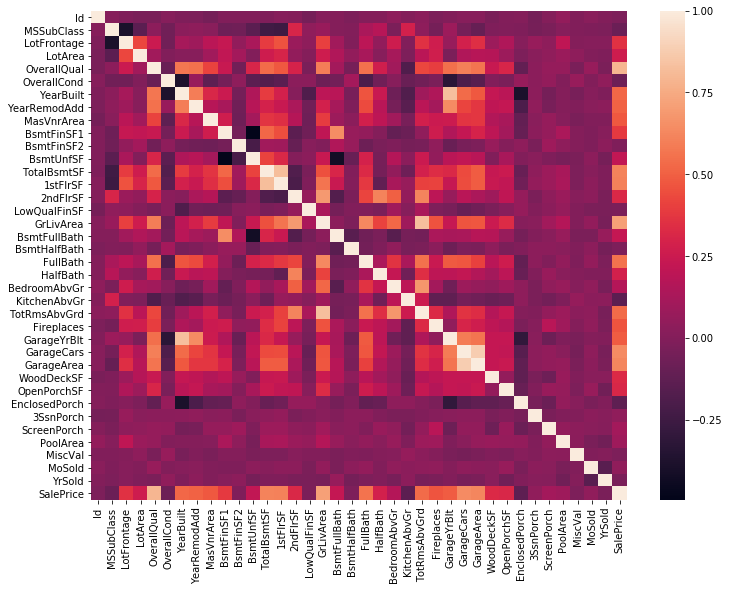

In [1240]:
corrdf=train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrdf)

#### If we look at the correlation with sale price we find the highest to be with 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF'

In [1241]:
train.corr()["SalePrice"].abs().sort_values(ascending=False)[:10]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

### Plotting a histogram and probability plot of target variable we find it is unimodal with a high right skewness

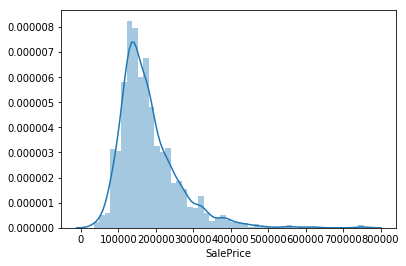

In [1242]:
sns.distplot(train["SalePrice"])

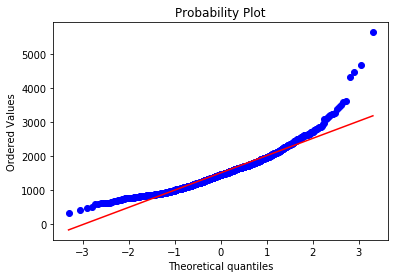

In [1243]:
res=stats.probplot(train['GrLivArea'], plot=plt)

#### Plotting a scatter plot with living area we find that the data is not homoscedastic as it has a cone shape(unequal variance of data)

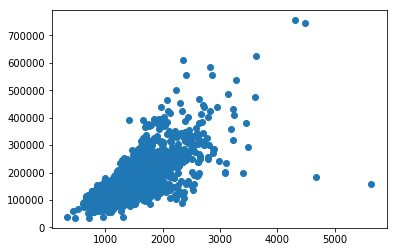

In [1244]:
plt.scatter(train["GrLivArea"],train["SalePrice"])

#### Models such as linear regression perform poorly on skewed data hence we will log transform the SalePrice which will solve all the above problems

In [1245]:
train["SalePrice"] = np.log1p(train["SalePrice"])

### The log transformation has fixed all the problems

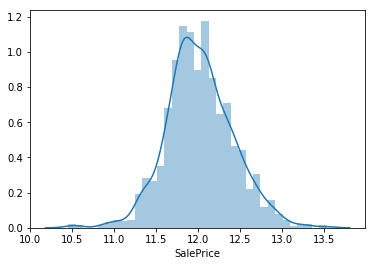

In [1246]:
sns.distplot(train["SalePrice"])

#### However there are two outliers which do not seem to follow the trend and need to be removed

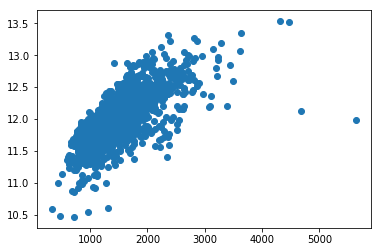

In [1247]:
plt.scatter(train["GrLivArea"],train["SalePrice"])

#### Sorting by GrLivArea we find the id of the 2 outliers

In [1248]:
train.sort_values(by = 'GrLivArea', ascending = False)[:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,11.982935
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,12.126764
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,13.521141
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,13.534474
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,13.345509


In [1249]:
try:
    
    
    train.drop(1298,inplace=True)
    
    train.drop(523,inplace=True)
    
except:
    pass


#### Outliers have been removed

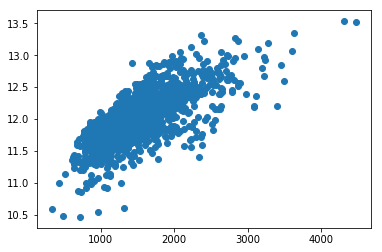

In [1250]:
plt.scatter(train["GrLivArea"],train["SalePrice"])

## Feature Engineering

In [1251]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice
combined = pd.concat((train, test),sort=False).reset_index(drop=True)
combined.drop(['SalePrice'], axis=1, inplace=True)
combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### Finding fraction of null values of the top 20 columns 

In [1252]:
(combined.isnull().sum()/len(combined)).sort_values(ascending=False)[:20]

PoolQC          0.996915
MiscFeature     0.964004
Alley           0.932122
Fence           0.804251
FireplaceQu     0.486802
LotFrontage     0.166610
GarageCond      0.054508
GarageQual      0.054508
GarageYrBlt     0.054508
GarageFinish    0.054508
GarageType      0.053822
BsmtCond        0.028111
BsmtExposure    0.028111
BsmtQual        0.027768
BsmtFinType2    0.027425
BsmtFinType1    0.027083
MasVnrType      0.008228
MasVnrArea      0.007885
MSZoning        0.001371
BsmtHalfBath    0.000686
dtype: float64

#### Removing columns with more than 20% of null values 

In [1253]:
combined=combined[combined.columns[(combined.isnull().sum()/len(combined))<0.20]]

In [1254]:
combined['Utilities'].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

### As we can see from value counts of utilities the feature is useless and will be removed

In [1255]:
try:
    combined = combined.drop(['Utilities'], axis=1)
except:
    pass


### Other null values will be dealt with different methods by filling 'None',0 or the mode value

In [1256]:
none_cols=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"MasVnrType",'MSSubClass']
zero_cols=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','GarageYrBlt', 'GarageArea', 'GarageCars',"MasVnrArea"]
mode_cols=['Electrical','Functional','KitchenQual','Exterior1st','Exterior2nd','SaleType']

for col in none_cols:
    combined[col]=combined[col].fillna("None")
for col in zero_cols:
    combined[col]=combined[col].fillna(0)
for col in mode_cols:
    combined[col]=combined[col].fillna(combined[col].mode()[0])

#### Lot Frontage will be common for the same neuighbourhod hence the median value for each neighbourhood will be filled accordingly

In [1257]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
combined["LotFrontage"] = combined.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
combined['MSZoning'] = combined.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))


#### No null values remain in the dataframe

In [1258]:
combined.isnull().sum().sort_values(ascending=False)[:5]

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

#### These numeric features are actually categorical features

In [1259]:
combined = combined.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

#### These categorical features can be represented as ordered numbers

In [1260]:
combined = combined.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [1261]:
train.corr()["SalePrice"].abs().sort_values(ascending=False)[:10]

SalePrice       1.000000
OverallQual     0.821405
GrLivArea       0.725211
GarageCars      0.681033
GarageArea      0.656129
TotalBsmtSF     0.647563
1stFlrSF        0.620500
FullBath        0.595899
YearBuilt       0.587043
YearRemodAdd    0.565992
Name: SalePrice, dtype: float64

### Adding new simplified features

In [1262]:
combined['YrBltAndRemod']=combined['YearBuilt']+combined['YearRemodAdd']
combined['AllSF']=combined['TotalBsmtSF'] + combined['1stFlrSF'] + combined['2ndFlrSF']

combined['AllFlrsSF'] = (combined['BsmtFinSF1'] + combined['BsmtFinSF2'] +
                                 combined['1stFlrSF'] + combined['2ndFlrSF'])

combined['TotalBath'] = (combined['FullBath'] + (0.5 * combined['HalfBath']) +
                               combined['BsmtFullBath'] + (0.5 * combined['BsmtHalfBath']))

combined['Total_porch_sf'] = (combined['OpenPorchSF'] + combined['3SsnPorch'] +
                              combined['EnclosedPorch'] + combined['ScreenPorch'] +
                              combined['WoodDeckSF'])

#### Adding binary features which indicate presence of pool, garage, basement etc.

In [1263]:
combined['haspool'] = combined['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
combined['has2ndfloor'] = combined['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
combined['hasgarage'] = combined['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
combined['hasbsmt'] = combined['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
combined['hasfireplace'] = combined['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

### Adding polynomial features for highly correlated features with SalePrice

In [1264]:

# Create new features
# 3* Polynomials on the top 10 existing features
combined["OverallQual-s2"] = combined["OverallQual"] ** 2
combined["OverallQual-s3"] = combined["OverallQual"] ** 3
combined["OverallQual-Sq"] = np.sqrt(combined["OverallQual"])

combined["AllSF-2"] = combined["AllSF"] ** 2
combined["AllSF-3"] = combined["AllSF"] ** 3
combined["AllSF-Sq"] = np.sqrt(combined["AllSF"])

combined["AllFlrsSF-2"] = combined["AllFlrsSF"] ** 2
combined["AllFlrsSF-3"] = combined["AllFlrsSF"] ** 3
combined["AllFlrsSF-Sq"] = np.sqrt(combined["AllFlrsSF"])

combined["GrLivArea-2"] = combined["GrLivArea"] ** 2
combined["GrLivArea-3"] = combined["GrLivArea"] ** 3
combined["GrLivArea-Sq"] = np.sqrt(combined["GrLivArea"])

combined["ExterQual-2"] = combined["ExterQual"] ** 2
combined["ExterQual-3"] = combined["ExterQual"] ** 3
combined["ExterQual-Sq"] = np.sqrt(combined["ExterQual"])

combined["GarageCars-2"] = combined["GarageCars"] ** 2
combined["GarageCars-3"] = combined["GarageCars"] ** 3
combined["GarageCars-Sq"] = np.sqrt(combined["GarageCars"])

combined["TotalBath-2"] = combined["TotalBath"] ** 2
combined["TotalBath-3"] = combined["TotalBath"] ** 3
combined["TotalBath-Sq"] = np.sqrt(combined["TotalBath"])

combined["KitchenQual-2"] = combined["KitchenQual"] ** 2
combined["KitchenQual-3"] = combined["KitchenQual"] ** 3
combined["KitchenQual-Sq"] = np.sqrt(combined["KitchenQual"])

### Doing a boxcox transformation(log transformation can also be done) on highly skewed input features

In [1265]:
numeric_feats = combined.dtypes[combined.dtypes != "object"].index

skewed_feats = combined[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.5]

skewed_feats = skewed_feats.index
print("Skewed features present : ",len(skewed_feats))

for i in skewed_feats:
    combined[i]= boxcox1p(combined[i], boxcox_normmax(combined[i]+1))

Skewed features present :  49


In [1266]:
combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,YrBltAndRemod,AllSF,AllFlrsSF,TotalBath,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,OverallQual-s2,OverallQual-s3,OverallQual-Sq,AllSF-2,AllSF-3,AllSF-Sq,AllFlrsSF-2,AllFlrsSF-3,AllFlrsSF-Sq,GrLivArea-2,GrLivArea-3,GrLivArea-Sq,ExterQual-2,ExterQual-3,ExterQual-Sq,GarageCars-2,GarageCars-3,GarageCars-Sq,TotalBath-2,TotalBath-3,TotalBath-Sq,KitchenQual-2,KitchenQual-3,KitchenQual-Sq
0,1,SC60,RL,18.144572,13.833055,2,4,Lvl,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,3.991517,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,19.433174,1.604478,2.127987,PConc,4,3,0,6,144.117862,1,0.0,29.991052,422.488452,GasA,5,Y,SBrkr,5.939033,1025.651978,0.0,8.353544,0.99344,0.000000,2,1.068837,3,0.750957,4,2.261968,8,0.000000,Attchd,2003.0,RFn,2.0,548.0,3,3,2,0.000000,12.080309,0.000000,0.0,0.0,0.0,0.0,Feb,2008,WD,Normal,4006,35.576152,12.159330,3.5,18.736117,0.0,1,1,1,0,9.201608,14.129957,2.645751,71.285291,106.928249,50.655701,24.378483,36.567875,5.877316,16.754681,25.132169,41.352146,2.94472,4.591384,1.206140,1.995555,2.523922,1.414214,3.330372,4.882433,1.870829,3.685453,5.666768,2.000000
1,2,SC20,RL,20.673625,14.117918,2,4,Lvl,FR2,3,Veenker,Feedr,Norm,1Fam,1Story,6,6.000033,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,1.382614,2.127987,CBlock,4,3,3,5,181.719186,1,0.0,44.135410,593.888092,GasA,5,Y,SBrkr,6.234989,0.000000,0.0,7.974694,0.00000,0.710895,2,0.000000,3,0.750957,3,1.996577,8,0.903334,Attchd,1976.0,RFn,2.0,460.0,3,3,2,56.184225,0.000000,0.000000,0.0,0.0,0.0,0.0,May,2007,WD,Normal,3952,35.371886,11.986132,2.5,51.635458,0.0,0,1,1,1,7.900671,12.054057,2.449490,70.875464,106.313507,50.239427,24.030414,36.045768,5.798052,15.992272,23.988542,35.524639,2.37588,3.594492,1.094563,1.995555,2.523922,1.414214,2.402165,3.392530,1.581139,2.846680,4.243357,1.732051
2,3,SC60,RL,18.668046,14.476513,2,3,Lvl,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,3.991517,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,17.768840,1.604478,2.127987,PConc,4,3,1,6,110.441033,1,0.0,56.896528,450.079654,GasA,5,Y,SBrkr,5.994335,1040.521059,0.0,8.408065,0.99344,0.000000,2,1.068837,3,0.750957,4,1.996577,8,0.903334,Attchd,2001.0,RFn,2.0,608.0,3,3,2,0.000000,9.901081,0.000000,0.0,0.0,0.0,0.0,Sep,2008,WD,Normal,4003,36.241071,12.018506,3.5,14.654640,0.0,1,1,1,1,9.201608,14.129957,2.645751,72.619348,108.929344,52.019227,24.095473,36.143358,5.812869,16.864403,25.296754,42.261093,2.94472,4.591384,1.206140,1.995555,2.523922,1.414214,3.330372,4.882433,1.870829,3.685453,5.666768,2.000000
3,4,SC70,RL,17.249650,14.106197,2,3,Lvl,Corner,3,Crawfor,Norm,Norm,1Fam,2Story,7,3.991517,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,1.382614,2.127987,BrkTil,3,4,0,5,61.795315,1,0.0,64.808848,378.854517,GasA,4,Y,SBrkr,6.027703,904.477422,0.0,8.358663,0.99344,0.000000,1,0.000000,3,0.750957,4,2.137369,8,0.903334,Detchd,1998.0,Unf,3.0,642.0,3,3,2,0.000000,8.966116,16.020712,0.0,0.0,0.0,0.0,Feb,2006,WD,Abnorml,3885,35.120723,11.652616,2.0,52.609462,0.0,1,1,1,1,9.201608,14.129957,2.645751,70.371547,105.557627,49.729267,23.360172,35.040399,5.645397,16.764983,25.147622,41.436699,2.37588,3.594492,1.094563,3.145866,4.121633,1.732051,1.880639,2.542782,1.414214,3.685453,5.666768,2.000000
4,5,SC60,

### Creating the dummy variables for one hot encoding

In [1267]:
all_data = pd.get_dummies(combined)
print(all_data.shape)

(2917, 309)


#### Removing columns which wont provide much valuable information for training the model

In [1268]:

overfit = []
for i in all_data.columns:
    counts = all_data[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(all_data) * 100 >99.94:
        overfit.append(i)
print(overfit)
all_data.drop(overfit,axis=1,inplace=True)

['MSSubClass_SC150', 'Condition2_RRAe', 'Condition2_RRAn', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'Heating_Floor', 'Electrical_Mix']


#### Splitting combined dataframe into train and test

In [1269]:
test_id=all_data[ntrain:]["Id"]
X_train = all_data[:ntrain].drop("Id",axis=1)
X_test = all_data[ntrain:].drop("Id",axis=1)
print(X_train.shape,y_train.shape,X_test.shape)

(1458, 298) (1458,) (1459, 298)


## Modelling

In [1270]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV#LINEAR REGRESSION MODELS
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### Defining functions for cross fold validation of model on train data and a rms error

In [1271]:
#Validation function
kf = KFold(n_splits=10, shuffle=True, random_state=69)

def cv_rmse(model):
    
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

#### Hyperparameters for model grid search

In [1272]:
# setup models    
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

#### Defining models

In [1273]:
ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=alphas_alt, cv=kfolds,))

lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas=alphas2,
                              random_state=42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas,
                                        cv=kfolds, random_state=42, l1_ratio=e_l1ratio))
                                        
svr = make_pipeline(RobustScaler(),
                      SVR(C= 20, epsilon= 0.008, gamma=0.0003,))


gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =42)
                                   

lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       #min_data_in_leaf=2,
                                       #min_sum_hessian_in_leaf=11
                                       )
                                       

xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006, random_state=42)

# stacking several models
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet,
                                            gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

#### Finding cross validation score on training set

In [1274]:
print('TEST score on CV')

score = cv_rmse(ridge)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(svr)
print("SVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lightgbm)
print("Lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(gbr)
print("GradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(xgboost)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

TEST score on CV
Kernel Ridge score: 0.1091 (0.0109)

Lasso score: 0.1084 (0.0094)

ElasticNet score: 0.1084 (0.0094)

SVR score: 0.1096 (0.0110)

Lightgbm score: 0.1156 (0.0095)

GradientBoosting score: 0.1139 (0.0100)

Xgboost score: 0.1126 (0.0088)



#### Fitting the models on training set

In [1275]:
print('StackingCVRegressor')
stack_gen_model = stack_gen.fit(np.array(X_train), np.array(y_train))
print('elasticnet')
elastic_model_full_data = elasticnet.fit(X_train, y_train)
print('lasso')
lasso_model_full_data = lasso.fit(X_train, y_train)
print('ridge')
ridge_model_full_data = ridge.fit(X_train, y_train)
print('svr')
svr_model_full_data = svr.fit(X_train, y_train)
print('GradientBoosting')
gbr_model_full_data = gbr.fit(X_train, y_train)
print('xgboost')
xgb_model_full_data = xgboost.fit(X_train, y_train)
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X_train, y_train)

StackingCVRegressor
elasticnet
lasso
ridge
svr
GradientBoosting
xgboost
lightgbm


### Creating ensemble for better predictions

In [1276]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

#### Training set accuracy of ensemble

In [1277]:
print(rmsle(y_train, blend_models_predict(X_train)))

0.06149007819150532


#### Exponentiating target variable to remove log transformation

In [1278]:
preds=pd.Series(np.floor(np.expm1(blend_models_predict(X_test))))

#### A brute force method I found which better predicts edge cases(very low or high prices)

In [1279]:
q1 = preds.quantile(0.0042)
q2 = preds.quantile(0.99)

preds = preds.apply(lambda x: x if x > q1 else x*0.77)
preds = preds.apply(lambda x: x if x < q2 else x*1.1)

#### Writing to submission file

In [1280]:
solution = pd.DataFrame({"id":test_id.values, "SalePrice":preds.values})
solution.to_csv("submission.csv", index = False)

### Plotting a residual vs fitted plot we find that the model overshoots the target variable as the residuals are skewed towards negative side

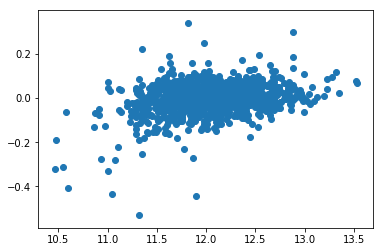

In [1281]:
train_preds=blend_models_predict(X_train)
plt.scatter(y_train,y_train-train_preds)

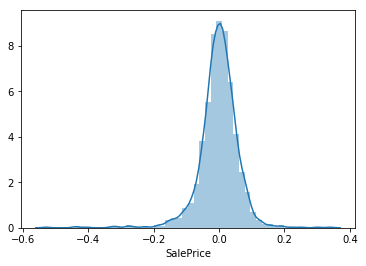

In [1282]:
sns.distplot(y_train-train_preds)


#### This can be fixed somehow to get a better accuracy